In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


In [5]:
def construct_datasets(path_type):
    all_files = glob.glob(path_type)
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df.rename(columns=lambda x: x.strip(), inplace=True)
        state_type = 3
        if 'Spontan' in filename:
            state_type = 1
        elif 'Sync' in filename:
            state_type = 2
        df['state_type'] = state_type
        df['name'] = filename.split("\\")[1]
        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    alone_right = pd.read_csv("HandRight.csv",index_col=None, header=0)
    alone_right.rename(columns=lambda x: x.strip(), inplace=True)
    alone_right["state_type"] = 3
    alone_right["name"] = ""
    df = alone_right.merge(df, how='right')
    
    return df
df = construct_datasets("Training/*/*.csv")

# Labels


| Label | Description |
| --- | --- |
| 1 | Spontan |
| 2 | Sync |
| 3 | Alone |

In [29]:
df.sort_values('Time')
df['Time'].value_counts()

556.3663    6
389.5588    5
402.2986    5
387.9850    5
409.7867    5
           ..
691.9188    1
502.8333    1
526.0196    1
641.8997    1
353.8984    1
Name: Time, Length: 195717, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331720 entries, 0 to 331719
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Time            331720 non-null  float64
 1   Frame ID        331720 non-null  int64  
 2   Hand Type       331720 non-null  object 
 3   # hands         331720 non-null  int64  
 4   Position X      331720 non-null  float64
 5   Position Y      331720 non-null  float64
 6   Position Z      331720 non-null  float64
 7   Velocity X      331720 non-null  float64
 8   Velocity Y      331720 non-null  float64
 9   Velocity Z      331720 non-null  float64
 10  Pitch           331720 non-null  float64
 11  Roll            331720 non-null  float64
 12  Yaw             331720 non-null  float64
 13  Wrist Pos X     331720 non-null  float64
 14  Wrist Pos Y     331720 non-null  float64
 15  Wrist Pos Z     331720 non-null  float64
 16  Elbow pos X     331720 non-null  float64
 17  Elbow Pos 

In [31]:
df

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,state_type,name
0,64.40649,97265,left,2,-86.51942,171.7137,-8.232538,-22.53298,-150.81820,-73.03683,...,146.5586,3.271789,-386.4925,55.26245,16.62144,0.0,0.620941,0.0,1,Evyatar Cohen
1,64.40649,97265,right,2,143.81830,183.1156,-12.084150,53.41466,-405.33720,82.53658,...,183.7971,34.498820,407.6624,78.40553,123.16780,0.0,0.259270,0.0,1,Evyatar Cohen
2,64.42323,97266,left,2,-86.83302,170.5757,-8.763070,-36.57425,-132.72730,-61.87682,...,145.2127,3.251141,-385.5093,51.27982,17.93486,0.0,0.637506,0.0,1,Evyatar Cohen
3,64.42323,97266,right,2,144.35500,179.8730,-11.506780,62.59536,-378.19170,67.33972,...,182.1488,34.862010,409.7145,82.42125,126.79130,0.0,0.239628,0.0,1,Evyatar Cohen
4,64.43949,97268,left,2,-87.18336,168.2926,-10.102310,-15.97579,-139.76710,-75.22957,...,143.2971,3.186100,-382.7727,43.07076,22.46692,0.0,0.753420,0.0,1,Evyatar Cohen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331715,856.26310,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.41030,190.77140,...,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,2,Yoel Raz
331716,856.29580,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,130.7078,34.033600,-295.5957,-14.97817,140.02630,0.0,0.000000,0.0,2,Yoel Raz
331717,856.29580,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.13531,155.74530,...,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,2,Yoel Raz
331718,856.32950,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,58.48146,...,131.6489,33.329450,-282.9649,-31.35462,135.07610,0.0,0.000000,0.0,2,Yoel Raz


Position X over time
plot position of Evyatar Cohen


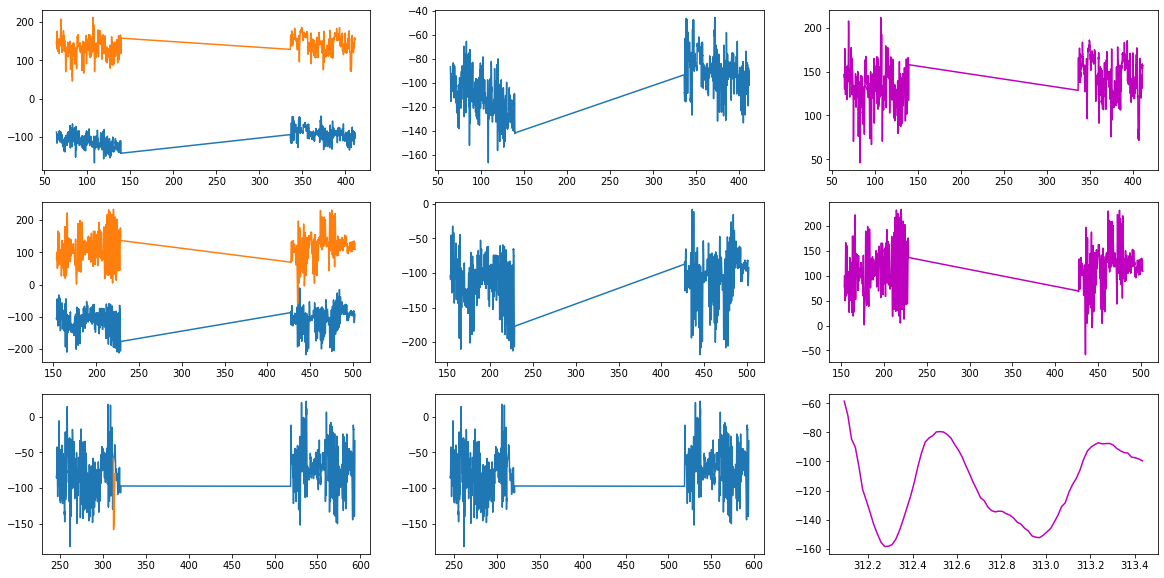

In [32]:
import matplotlib.dates as matdates

def plot_position_over_time(position):
    print(position,"over time")
    for name in df["name"].dropna().unique()[:1]:#you can remove the [] to print for all persons
        print("plot position of",name)
        fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,10))
        for state_type in range(1,4):
            x_pos_over_timer = df[(df["name"]==name) & (df["state_type"]==state_type)][["Time",position,"Hand Type"]]
            left_x_pos_over_timer = x_pos_over_timer[x_pos_over_timer["Hand Type"]=="left"]
            right_x_pos_over_timer = x_pos_over_timer[x_pos_over_timer["Hand Type"]=="right"]
            ax[state_type-1][0].plot(left_x_pos_over_timer["Time"],left_x_pos_over_timer[position])
            ax[state_type-1][0].plot(right_x_pos_over_timer["Time"],right_x_pos_over_timer[position])
            ax[state_type-1][1].plot(left_x_pos_over_timer["Time"],left_x_pos_over_timer[position])
            ax[state_type-1][2].plot(right_x_pos_over_timer["Time"],right_x_pos_over_timer[position],"m")
        plt.show()
plot_position_over_time("Position X")

Position Y over time
plot position of Evyatar Cohen


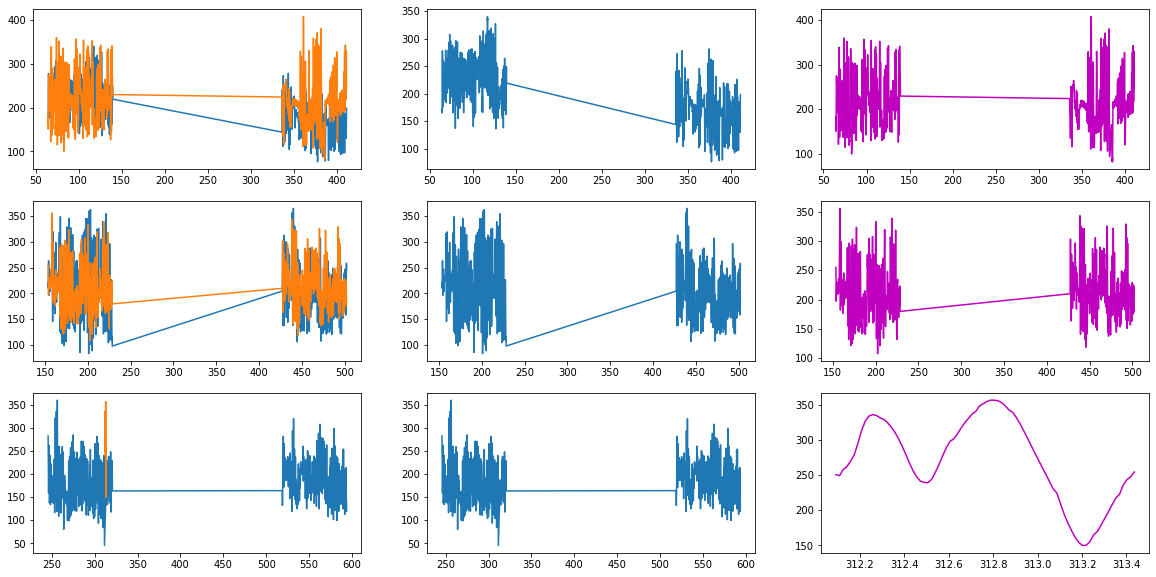

In [33]:
plot_position_over_time("Position Y")

Position Z over time
plot position of Evyatar Cohen


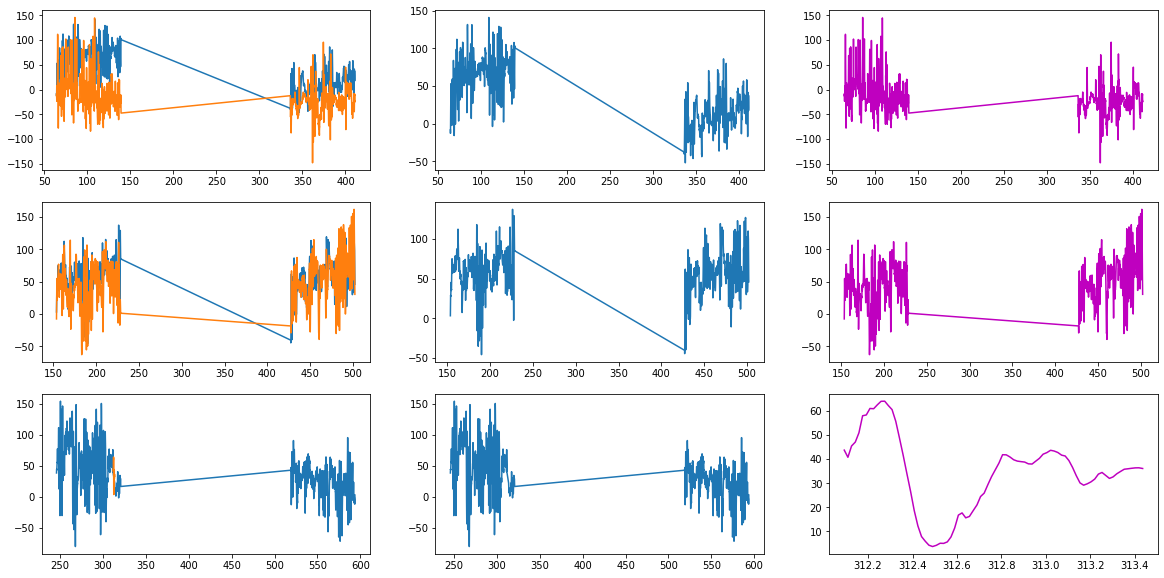

In [34]:
plot_position_over_time("Position Z")

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,state_type,name
90445,52.00663,6065,left,2,-264.11730,224.1980,75.899460,158.97420,-96.67828,-95.49094,...,157.6220,52.98164,-393.1893,-69.68469,74.90703,0.000000,0.000000,0.0,1,Oriya Social_Nuero
90446,52.00663,6065,right,2,143.96350,273.1676,103.945900,141.35620,225.92190,563.77390,...,225.3446,112.82390,371.4650,41.49383,154.26700,0.000000,0.749941,0.0,1,Oriya Social_Nuero
90448,52.02296,6067,right,2,146.61040,276.7957,113.326100,140.84840,226.42810,526.52500,...,228.3056,119.55580,364.9230,36.24656,160.07720,0.000000,0.926566,0.0,1,Oriya Social_Nuero
90447,52.02296,6067,left,2,-262.93600,223.0686,74.124690,47.73351,-59.63723,-104.94280,...,156.1815,51.68819,-376.5264,-78.07376,75.58520,0.000000,0.010044,0.0,1,Oriya Social_Nuero
90450,52.03953,6069,right,2,151.57950,281.5556,122.646600,313.37950,245.60920,531.19300,...,232.2564,125.73680,364.7589,35.26894,160.75300,0.016851,1.125768,0.0,1,Oriya Social_Nuero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331715,856.26310,67309,right,2,101.91230,212.0264,42.535680,79.95810,113.41030,190.77140,...,149.6264,66.09853,283.6185,-58.03491,95.29868,0.000000,0.000000,0.0,2,Yoel Raz
331716,856.29580,67311,left,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,130.7078,34.03360,-295.5957,-14.97817,140.02630,0.000000,0.000000,0.0,2,Yoel Raz
331717,856.29580,67311,right,2,103.84750,214.7484,47.070820,61.11773,95.13531,155.74530,...,151.5924,68.17693,288.9688,-54.13820,94.23959,0.000000,0.000000,0.0,2,Yoel Raz
331718,856.32950,67314,left,2,-84.05124,187.8450,-5.172269,-57.17249,109.20360,58.48146,...,131.6489,33.32945,-282.9649,-31.35462,135.07610,0.000000,0.000000,0.0,2,Yoel Raz


# Models

In [14]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,train_test_split
import warnings
from sklearn.utils import shuffle
#warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [25]:
df[9000:9057]

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,state_type,name
9000,138.9564,105856,left,2,-110.57520,206.6059,50.802140,-73.922550,216.94600,79.899120,...,175.0557,46.794470,-398.2675,69.244780,49.607370,0.000000,1.127601,0.000000,1,Evyatar Cohen
9001,138.9564,105856,right,2,123.83210,277.7304,-19.480920,-136.442600,170.27490,124.498800,...,237.4913,20.815140,309.6687,65.606380,127.334900,0.000000,1.114715,0.180064,1,Evyatar Cohen
9002,138.9731,105858,left,2,-112.61130,211.2432,52.459890,-117.505600,258.07920,97.266270,...,180.5052,48.975310,-396.5663,66.318600,52.933300,0.000000,1.114767,0.000000,1,Evyatar Cohen
9003,138.9731,105858,right,2,121.35080,278.3241,-16.752340,-165.366300,-61.84533,185.873700,...,238.5434,19.048580,307.5243,64.762740,127.784300,0.000000,1.170311,0.526132,1,Evyatar Cohen
9004,138.9895,105860,left,2,-114.14380,214.4919,54.072100,-83.721640,168.00940,92.922400,...,184.8769,50.663050,-395.2057,64.312700,53.712470,0.000000,0.692190,0.000000,1,Evyatar Cohen
9005,138.9895,105860,right,2,119.27190,276.9197,-14.213100,-117.765700,-135.61040,143.144800,...,237.0225,17.587050,299.5893,55.364700,124.085100,0.000000,1.118949,0.735059,1,Evyatar Cohen
9006,139.0061,105862,left,2,-116.98830,220.9640,56.990250,-155.844600,379.94570,176.256400,...,188.1462,52.120070,-393.7660,62.950590,51.843540,0.000000,0.426205,0.000000,1,Evyatar Cohen
9007,139.0061,105862,right,2,117.73220,274.4112,-12.400670,-76.165570,-142.10870,85.472520,...,232.8054,16.401050,293.5210,45.237340,118.562900,0.000000,0.539908,0.708920,1,Evyatar Cohen
9008,139.0226,105864,left,2,-119.99870,227.0661,59.843610,-179.743400,326.06290,154.014500,...,193.1665,54.218330,-392.8441,62.573990,49.791730,0.000000,0.297657,0.000000,1,Evyatar Cohen
9009,139.0226,105864,right,2,117.06760,271.9198,-11.508340,-19.443950,-156.00320,45.459880,...,228.5868,15.403090,286.8701,35.515940,113.994000,0.000000,0.386910,0.621089,1,Evyatar Cohen


In [10]:
df1 = shuffle(df)
df1.head(15)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,state_type,name
186147,296.8643,34942,left,2,-80.72591,199.9159,110.673800,78.947420,202.716300,248.22670,...,180.4734,93.962500,-331.3016,52.497040,196.98100,0.000000,0.933553,0.000000,1,Revital Marbel
237396,542.2703,65066,right,2,22.80118,259.5311,61.820700,-103.340200,191.172000,-50.37103,...,198.2969,67.149590,255.8400,62.284420,94.77943,0.000000,0.000000,0.000000,2,Shahar Terner
268076,519.4224,60259,left,2,-60.51777,201.5382,152.402800,15.803970,3.067844,-20.03661,...,138.0419,149.235400,-290.3804,-26.009900,185.53330,0.000000,0.009906,0.000000,1,Shelly Social_Nuero
106096,322.9083,37286,left,1,-189.22710,234.6571,39.155070,168.851000,-139.458800,-100.67410,...,165.3195,20.168390,-291.8971,-71.005650,28.33513,0.000000,0.047966,0.000000,3,Oriya Social_Nuero
25999,364.2777,131815,left,2,-96.60961,216.7773,56.224440,-6.738599,-55.711750,210.98540,...,148.7906,47.017960,-267.2331,-36.319130,10.76650,0.000000,0.000000,0.000000,1,Evyatar Cohen
31544,410.2171,137109,right,2,131.28740,216.8792,-42.973470,38.089410,-5.474143,-69.18419,...,177.1830,-2.045226,263.4789,-3.847566,135.65310,0.382628,1.583204,1.000000,1,Evyatar Cohen
130680,684.1290,78926,left,1,-151.28740,205.8687,-8.170898,114.042500,-62.036730,-26.80009,...,160.3817,-26.886730,-417.5635,12.285730,-49.29259,0.000000,0.000000,0.000000,3,Oriya Social_Nuero
236439,534.3349,64151,left,2,-83.10935,197.1038,51.430020,21.487110,-20.602060,115.79950,...,129.9015,48.570380,-238.4052,-72.067490,35.01511,0.000000,0.000000,0.000000,2,Shahar Terner
293196,223.3199,26276,left,2,-182.32580,144.5575,38.893730,-48.880020,328.682600,-40.21554,...,128.9611,36.267590,-392.0556,-72.950350,59.45555,0.062783,1.266861,0.688543,1,Yael Hagai
55034,198.1157,23843,right,2,378.65670,212.0930,16.491420,310.358500,81.855810,46.26060,...,149.6438,31.133830,321.5065,-14.425670,229.79070,0.000000,0.750379,0.176478,3,Nofar Social_Nuero


In [12]:
y = df["state_type"]
X = df.drop(['Frame ID','Hand Type','# hands','name','state_type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
model = Sequential()
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build()
print(model.summary())

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

# Validation

In [96]:
test_df = construct_datasets("Validation/*/*.csv")
kf = KFold(n_splits=4,shuffle=True,random_state=93)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,state_type,name
0,445.3185,52654,right,2,128.15300,218.7197,60.37725,47.95857,-39.96753,-52.944150,...,199.7000,68.58939,370.8766,35.98276,114.1168,0.0,0.697843,0.000000,1,Itiel Lab
1,445.3185,52654,left,2,-118.79860,189.2057,22.02865,18.57612,-24.75736,-6.268249,...,166.5372,39.80411,-389.7113,102.57890,153.5285,0.0,2.097542,0.212742,1,Itiel Lab
2,445.3350,52656,right,2,128.68630,217.6665,59.12631,45.23807,-41.40622,-67.647170,...,198.8316,65.92238,380.3675,45.75144,114.1267,0.0,0.797956,0.000000,1,Itiel Lab
3,445.3350,52656,left,2,-118.34750,188.5808,22.01872,25.97076,-32.45813,0.125023,...,166.5907,39.26244,-391.7210,99.02240,147.0519,0.0,1.999107,0.275051,1,Itiel Lab
4,445.3514,52658,right,2,129.78710,217.3515,57.75356,66.80715,-13.31386,-93.414820,...,199.9675,63.32793,391.6194,59.67964,112.6302,0.0,0.906191,0.000000,1,Itiel Lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90008,998.8158,66221,left,2,-96.74767,323.8981,76.98316,27.14988,185.62180,33.741870,...,267.8716,68.90888,-298.0420,57.52314,124.0967,0.0,0.075099,0.000000,2,Oded Medina
90009,998.8495,66224,right,2,111.83100,324.5124,102.83410,86.42312,119.68330,-13.673710,...,269.7217,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.000000,2,Oded Medina
90010,998.8495,66224,left,2,-95.67720,329.8123,78.13316,47.37696,118.31670,24.152470,...,273.4537,69.90453,-300.8497,65.10999,120.6967,0.0,0.029208,0.000000,2,Oded Medina
90011,998.8855,66227,right,2,113.80260,325.5213,101.48600,54.98372,11.75017,-37.260060,...,270.7919,101.25900,344.8011,75.97822,121.1411,0.0,0.025365,0.000000,2,Oded Medina
